<a href="https://colab.research.google.com/github/753x/AIFFEL_ONLINE_QUEST/blob/master/DeepLearning/Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **데이터 로드 및 전처리**

In [4]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [6]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [7]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

## **모델 구성 및 컴파일**

In [8]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(units = 52, activation = 'relu', input_shape=(train_data.shape[1], )))
model.add(layers.Dense(39, activation='relu'))
model.add(layers.Dense(26, activation='relu'))
model.add(layers.Dense(1, activation='relu'))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 52)                728       
                                                                 
 dense_1 (Dense)             (None, 39)                2067      
                                                                 
 dense_2 (Dense)             (None, 26)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 27        
                                                                 
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


## **모델 학습**

In [9]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
epochs = 60  # 에포크 수 설정
batch_size = 32  # 배치 크기 설정

# 모델 학습
history = model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size,
                    validation_split=0.25)

Epoch 1/60
10/10 [==============================] - 2s 29ms/step - loss: 549.2311 - mae: 21.7337 - val_loss: 679.5889 - val_mae: 24.1142
Epoch 2/60
10/10 [==============================] - 0s 7ms/step - loss: 533.1890 - mae: 21.3796 - val_loss: 645.5802 - val_mae: 23.4090
Epoch 3/60
10/10 [==============================] - 0s 7ms/step - loss: 499.0111 - mae: 20.5216 - val_loss: 601.1575 - val_mae: 22.4415
Epoch 4/60
10/10 [==============================] - 0s 6ms/step - loss: 456.3607 - mae: 19.4447 - val_loss: 542.4105 - val_mae: 21.1242
Epoch 5/60
10/10 [==============================] - 0s 6ms/step - loss: 397.1783 - mae: 17.8834 - val_loss: 456.5443 - val_mae: 19.0983
Epoch 6/60
10/10 [==============================] - 0s 6ms/step - loss: 313.1811 - mae: 15.5238 - val_loss: 338.5859 - val_mae: 15.9986
Epoch 7/60
10/10 [==============================] - 0s 6ms/step - loss: 207.7980 - mae: 12.2521 - val_loss: 201.1312 - val_mae: 11.8384
Epoch 8/60
10/10 [=============================

<ipython-input-13-ca108acd7502>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


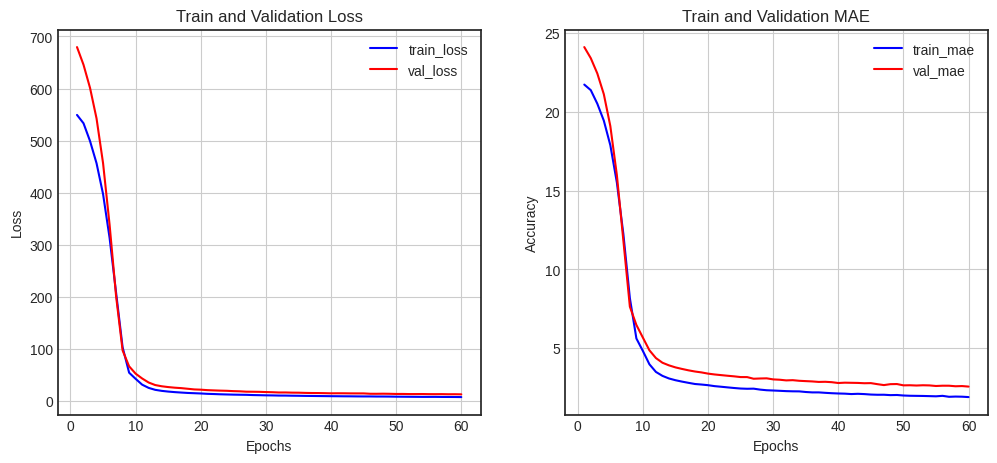

In [13]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# **모델 평가 및 예측**

In [14]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 19.8729 - mae: 2.8595


[19.872873306274414, 2.859485626220703]